# Gaussian Mixture Models (GMM)

GMMs are based on the assumption that all data points come from a fine mixture of Gaussian distributions with unknown parameters. For each observation, GMMs learn the probabilities of that example to belong to each cluster $k$.

In general, GMMs try to learn each cluster as a different Gaussian distribution. It assumes the data is generated from a limited mixture of Gaussians. 

Assuming one-dimensional data and the number of clusters $K= 3$, GMMs attempt to learn $9$ parameters.

- $3$ parameters for the means
- $3$ parameters for the variances
- $3$ scaling parameters

Each cluster is represented by an individual Gaussian distribution. For each Gaussian, it learns one mean and one variance parameters from data.

To learn such parameters, GMMs use the expectation-maximization (EM) algorithm to optimize the maximum likelihood. In the process, GMM uses Bayes Theorem to calculate the probability of a given observation xᵢ to belong to each clusters $k$, for $k = 1,2,…, K$.

## Exercise 1 (GMM on 1-D dataset)

Build a toy dataset by  100 points from $K=3$ different Gaussian distributions. Each one (with its own mean and variance) represents a different cluster in our synthesized data.

$X$ is normally distributed with mean $\mu_k$ and covariance $\Sigma_k$:
<center>
$X \sim \mathcal{N}(\mu_k,\,\Sigma_k)$
</center>

such that 
<center>
$p(x) = \sum_{k=1}^{K=3} \pi_k \mathcal{N}(x|\mu_k,\,\Sigma_k)$
</center>

where,
- $\pi_k$ : weight parameter for the $k^{th}
$ cluster.
- $\sum_{k=1}^K \pi_k = 1$
- $0 \leq \pi_k \leq 1$
- $\mathcal{N}(x|\mu_k,\,\Sigma_k)$ is the likelihood.

Use expectation-maximization algorithm to optimize the parameters (comprising the means and covariances of the components and the weight parameters).

Steps for Algorithm:


1.   Initialize the means $\mu_k$, covariances $\Sigma_k$ and weight parameters $\pi_k$.
2.   Then, we can start maximum likelihood optimization using the EM algorithm. EM can be simplified in 2 phases: The $E$ (expectation) and $M$ (maximization) steps.
3.   In the E step, we calculate the likelihood of each observation $x_i$ using the estimated parameters. For each cluster $k = 1,2,3,…,K$, we calculate the probability density (pdf) of our data using the estimated values for the mean and variance. At this point, these values are mere random guesses. Then, we can calculate the likelihood of a given example $x_i$ to belong to the $k^{th}$ cluster.

  <center>
  $\gamma\left(\mathbf{z}_{k}\right)=p\left(\mathbf{z}_{k}=1 \mid \mathbf{x}\right)=\frac{p\left(\mathbf{z}_{k}=1\right) p\left(\mathbf{x} \mid \mathbf{z}_{k}=1\right)}{\sum_{j=1}^{K} p\left(\mathbf{z}_{j}=1\right) p\left(\mathbf{x} \mid \mathbf{z}_{j}=1\right)}
  =\frac{\pi_{k} \mathcal{N}\left(\mathbf{x} \mid \mu_{k}, \boldsymbol{\Sigma}_{k}\right)}{\sum_{j=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x} \mid \mu_{j}, \mathbf{\Sigma}_{j}\right)}$
  </center>

  where $z$ is a $K$-dimensional binary random variable such that,
  - $z_k \in \{0,1\}$
  - $\sum_{k=1}^K z_k = 1$
  - $p(z_k) = \pi_k$

4.   Then, in the maximization, or M step, we re-estimate our learning parameters as follows.

  <center>
  $\mu_{k}=\frac{1}{N_{k}} \sum_{i=1}^{N} \gamma\left(\mathbf{z}_{k i}\right) \mathbf{x}_{i}$,
    
  $\Sigma_{k}=\frac{1}{N_{k}} \sum_{i=1}^{N} \gamma\left(\mathbf{z}_{k i}\right)\left(\mathbf{x}_{i}-\boldsymbol{\mu}_{k}\right)\left(\mathbf{x}_{i}-\boldsymbol{\mu}_{k}\right)^{\top}$,

  $\pi_k = \frac{N_k}{N}$
  </center>

  where,
  - $N_k$ is the effective number of points assigned to cluster $k$.
  - $\gamma(z_{ki})$ is the posterior probability which acts as the weighting factor for data point $x_i$.


5.  Repeat these steps until converge. That could be up to a point where parameters’ updates are smaller than a given tolerance threshold. At each iteration, we update our parameters so that it resembles the true data distribution.

In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
import seaborn as sns
import pandas as pd
plt.rcParams["axes.grid"] = False

### Creating a Synthetic Dataset

In [2]:
# define the number of points
n_samples = 100
mu1, sigma1 = -4, 1.2 # mean and variance
mu2, sigma2 = 4, 1.8 # mean and variance
mu3, sigma3 = 0, 1.6 # mean and variance

x1 = np.random.normal(mu1, np.sqrt(sigma1), n_samples)
x2 = np.random.normal(mu2, np.sqrt(sigma2), n_samples)
x3 = np.random.normal(mu3, np.sqrt(sigma3), n_samples)

X = np.array(list(x1) + list(x2) + list(x3))
np.random.shuffle(X)
print("Dataset shape:", X.shape)

Dataset shape: (300,)


### Creating Probability Density Function

In [3]:
def pdf(data, mean: float, variance: float):
  # A normal continuous random variable.
  s1 = 1/(np.sqrt(2*np.pi*variance))
  s2 = np.exp(-(np.square(data - mean)/(2*variance)))
  return s1 * s2

[]

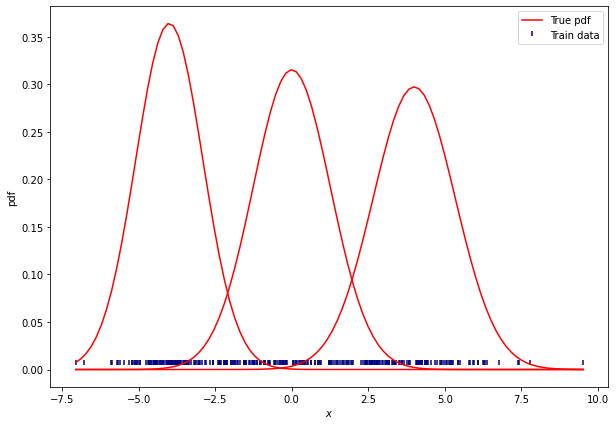

In [4]:
# visualize the training data
bins = np.linspace(np.min(X),np.max(X),100)

plt.figure(figsize=(10,7))
plt.xlabel("$x$")
plt.ylabel("pdf")
plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

plt.plot(bins, pdf(bins, mu1, sigma1), color='red', label="True pdf")
plt.plot(bins, pdf(bins, mu2, sigma2), color='red')
plt.plot(bins, pdf(bins, mu3, sigma3), color='red')

plt.legend()
plt.plot()

In [5]:
# define the number of clusters to be learned
k = 3
weights = np.ones((k)) / k
means = np.random.choice(X, k)
variances = np.random.random_sample(size=k)
print(means, variances)

[0.32467828 1.82449375 9.51664338] [0.1849422  0.72350616 0.91378598]


In [6]:
X = np.array(X)
print(X.shape)

(300,)


### Experimentation

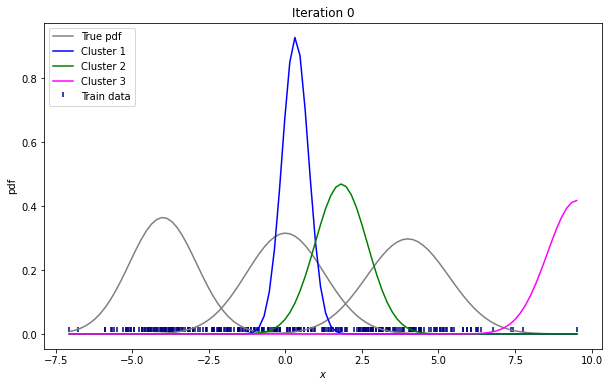

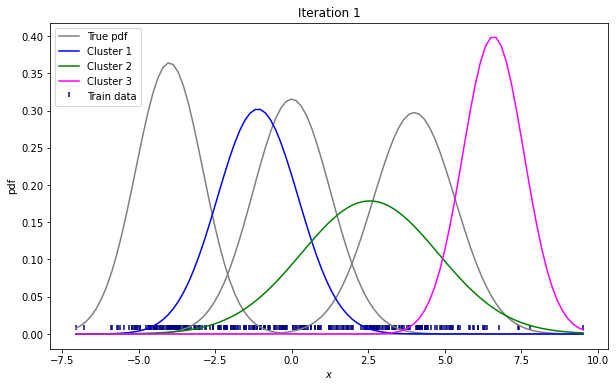

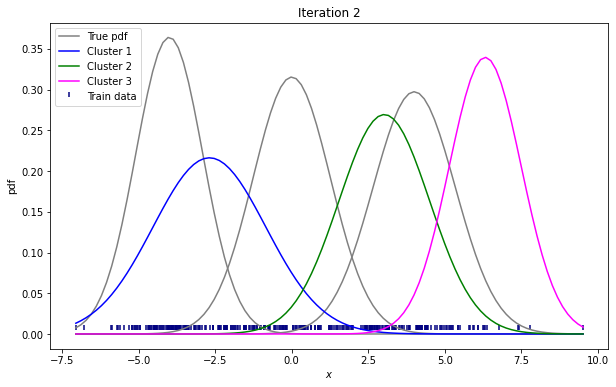

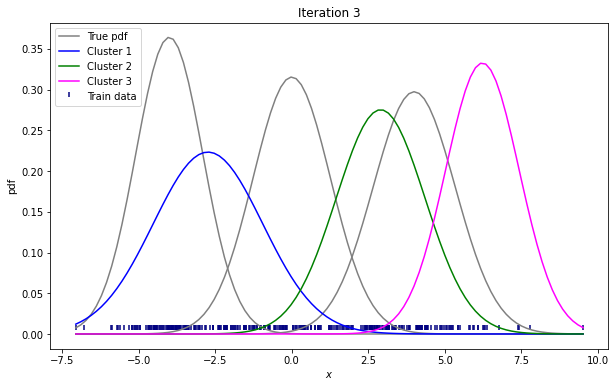

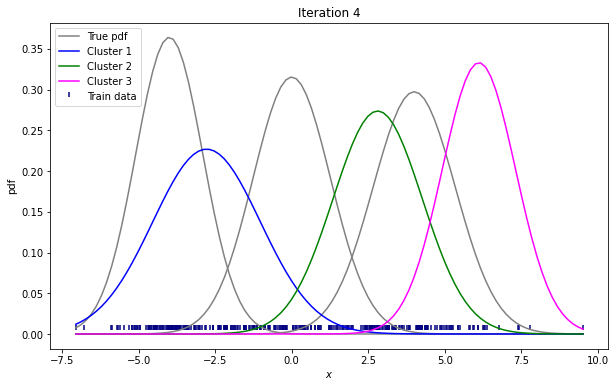

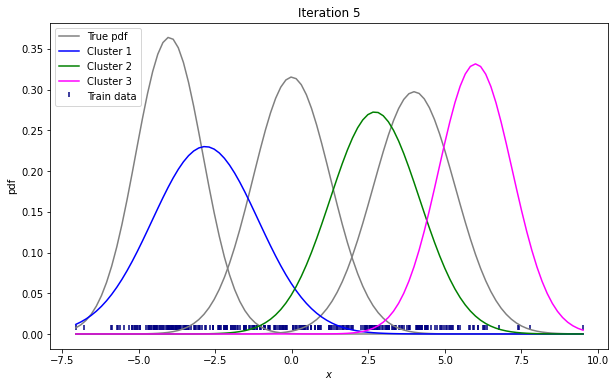

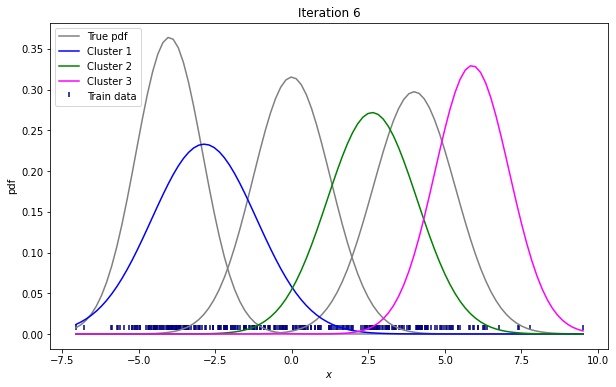

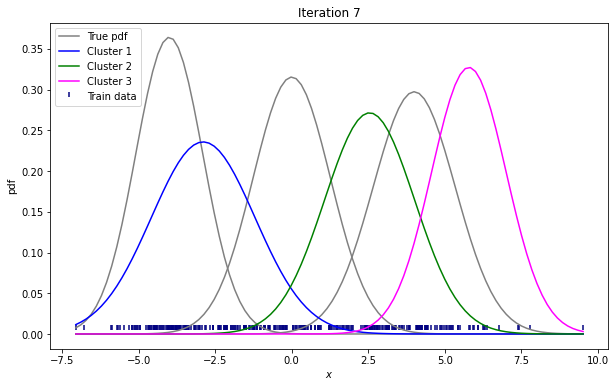

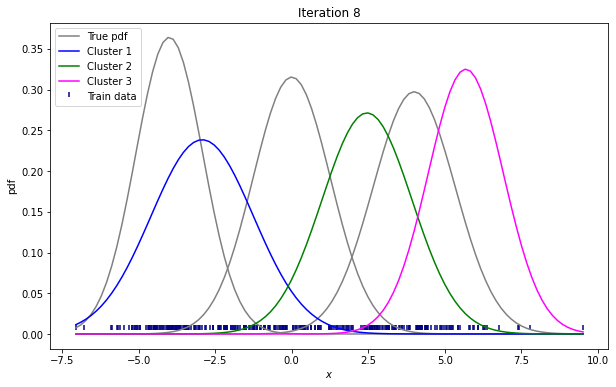

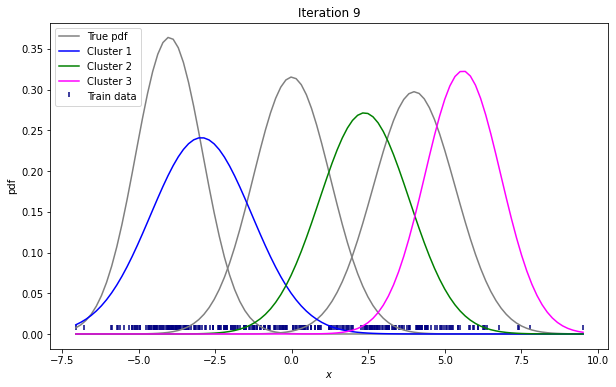

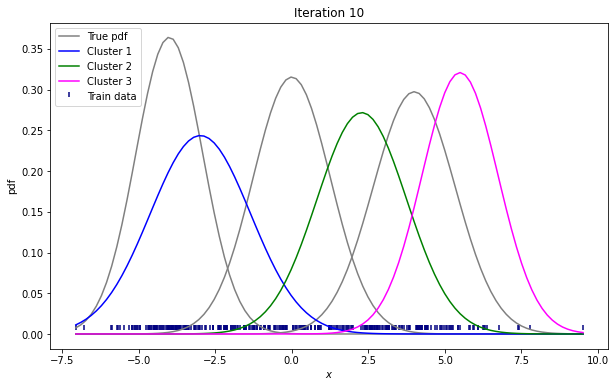

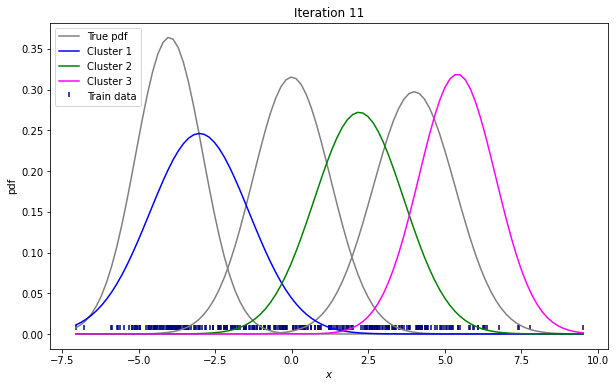

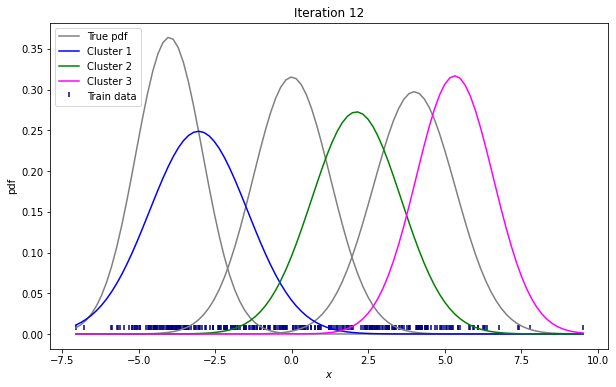

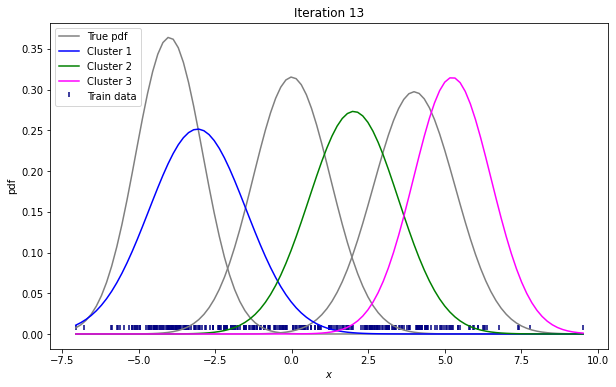

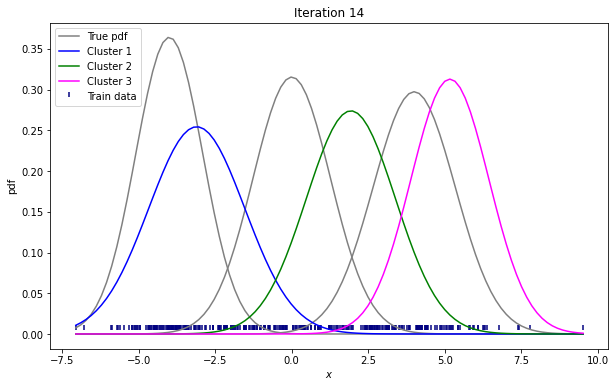

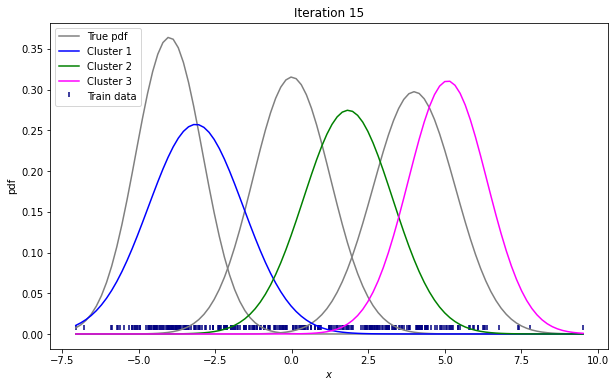

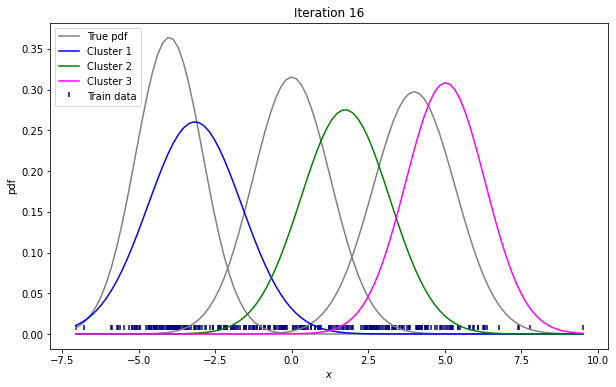

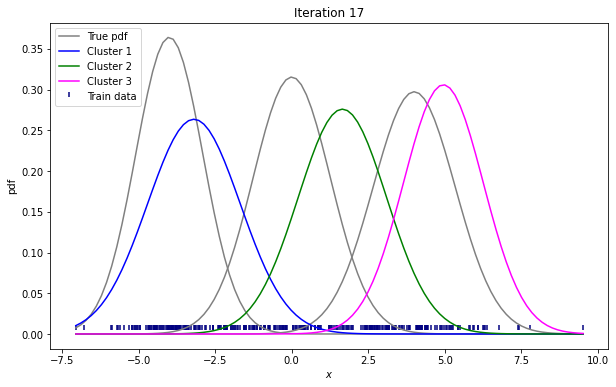

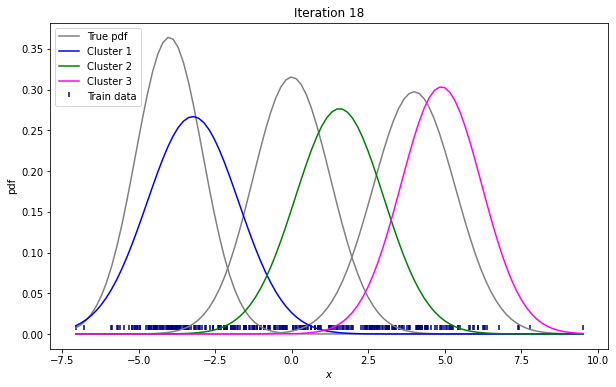

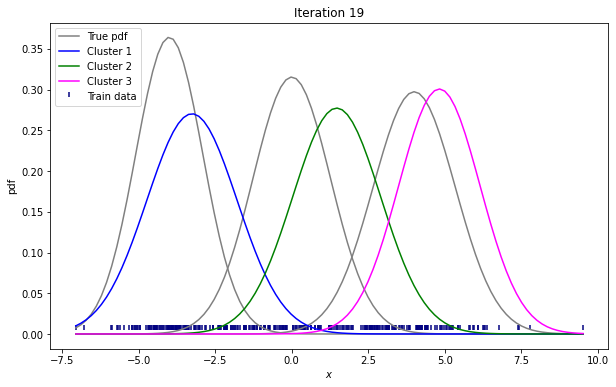

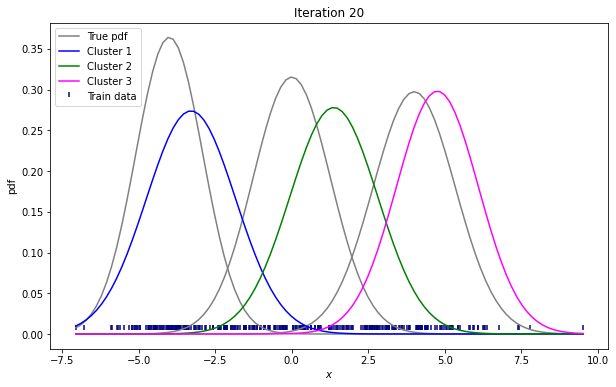

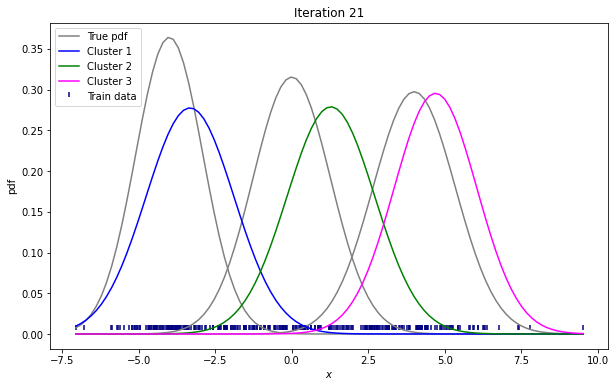

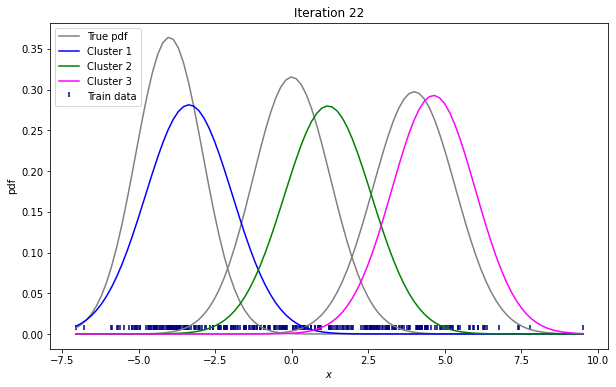

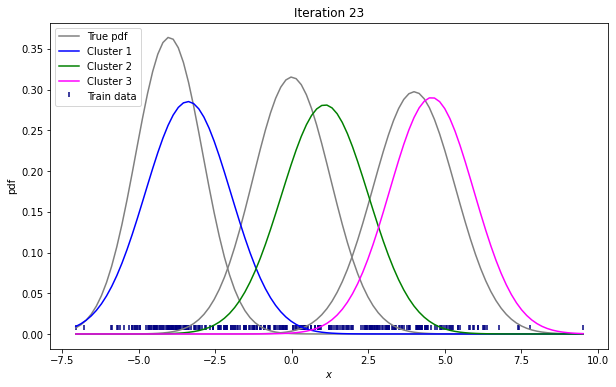

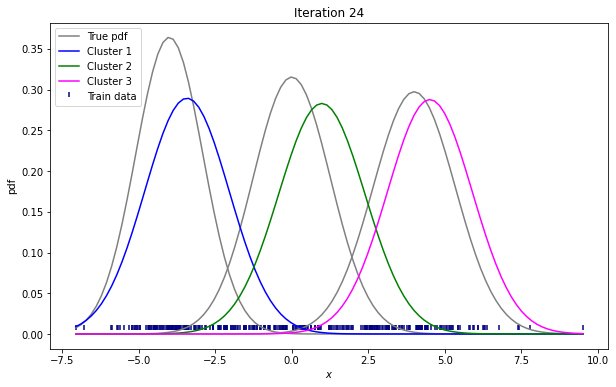

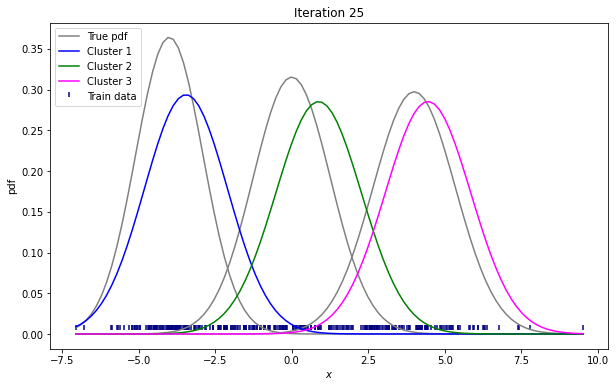

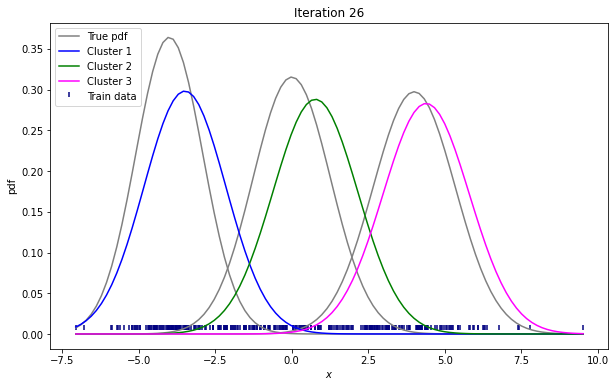

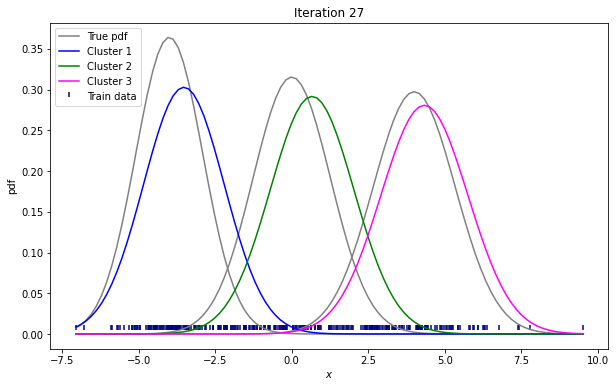

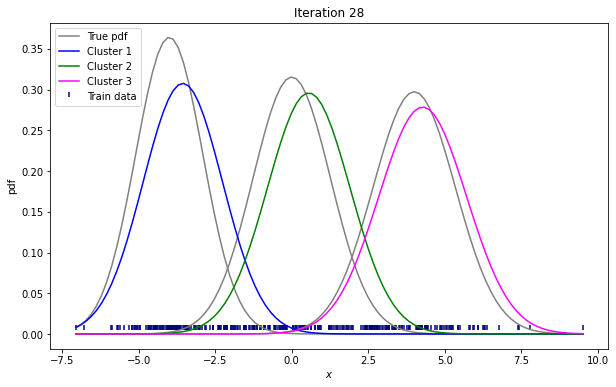

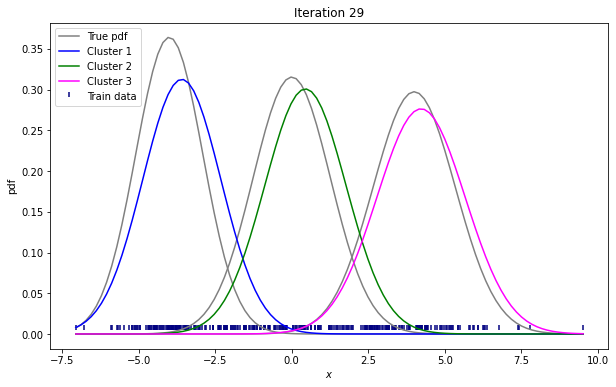

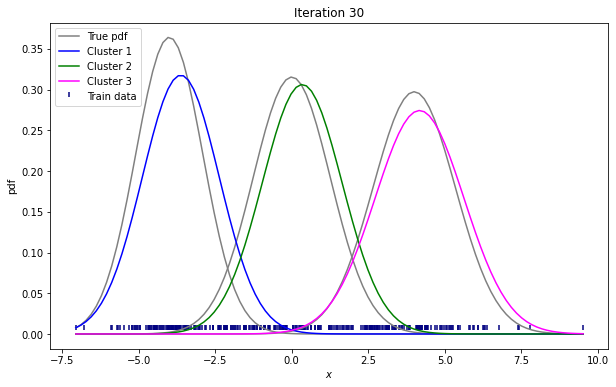

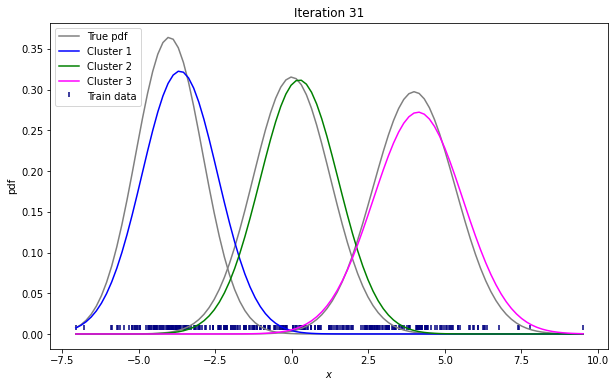

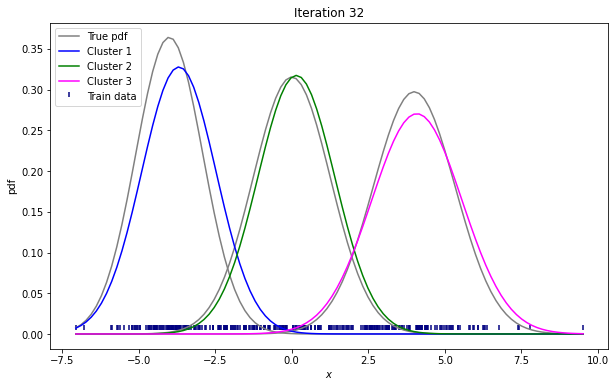

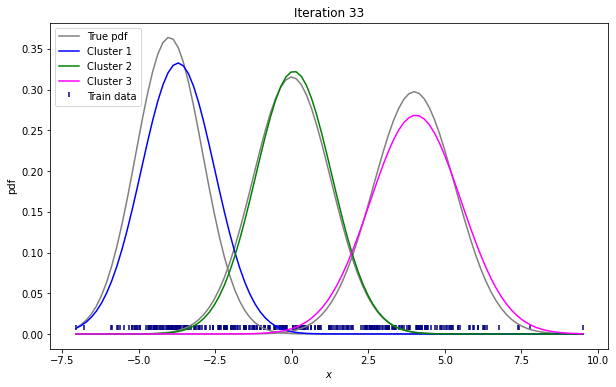

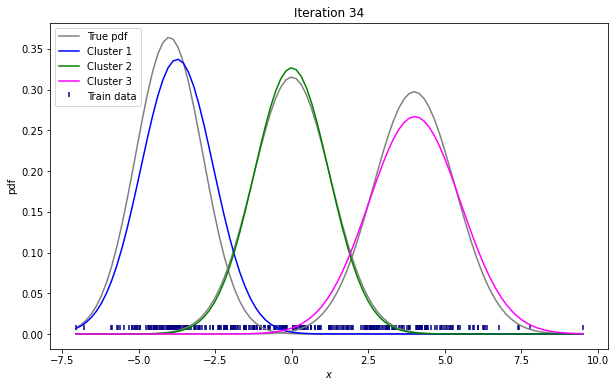

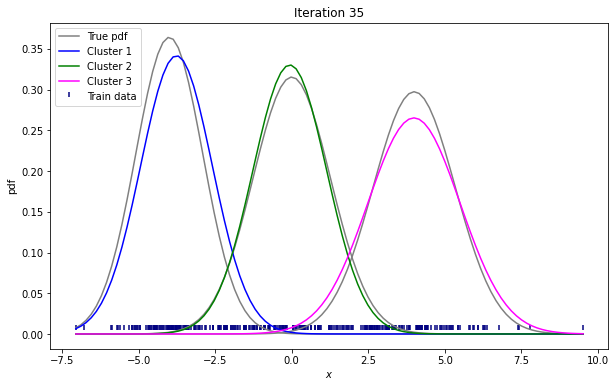

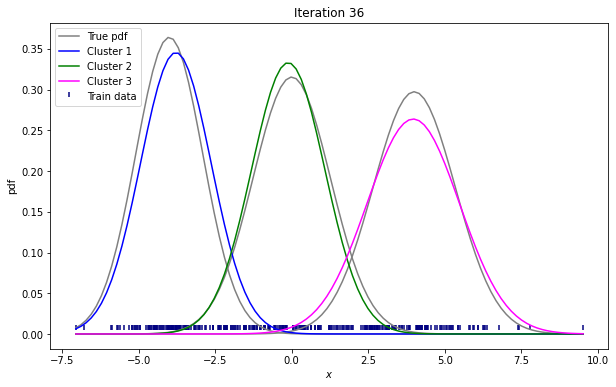

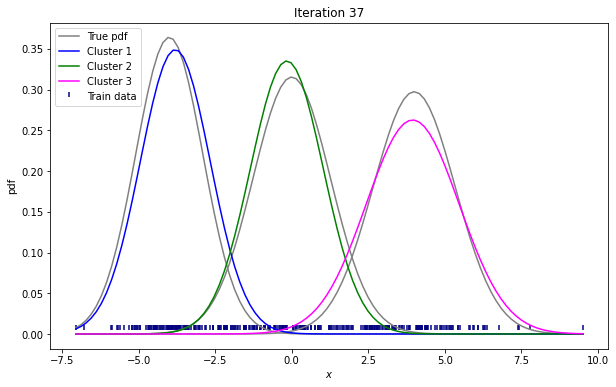

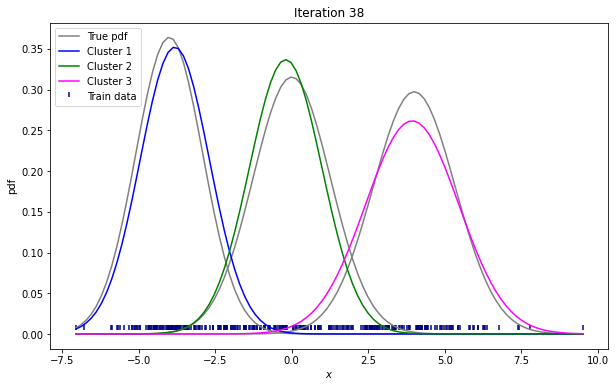

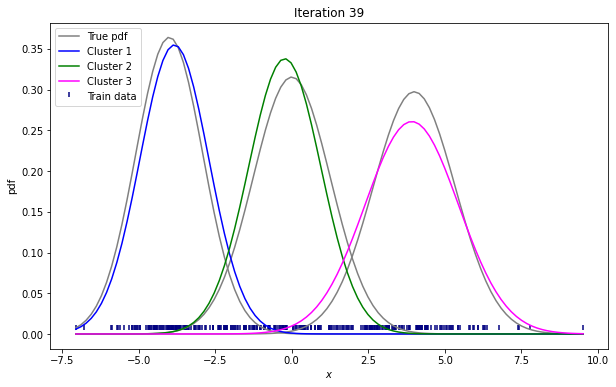

In [7]:
eps=1e-8
for step in range(40):
  
  if step % 1 == 0:
    plt.figure(figsize=(10,6))
    axes = plt.gca()
    plt.xlabel("$x$")
    plt.ylabel("pdf")
    plt.title("Iteration {}".format(step))
    plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

    plt.plot(bins, pdf(bins, mu1, sigma1), color='grey', label="True pdf")
    plt.plot(bins, pdf(bins, mu2, sigma2), color='grey')
    plt.plot(bins, pdf(bins, mu3, sigma3), color='grey')

    plt.plot(bins, pdf(bins, means[0], variances[0]), color='blue', label="Cluster 1")
    plt.plot(bins, pdf(bins, means[1], variances[1]), color='green', label="Cluster 2")
    plt.plot(bins, pdf(bins, means[2], variances[2]), color='magenta', label="Cluster 3")
    
    plt.legend(loc='upper left')
    
    plt.show()
  
  # calculate the maximum likelihood of each observation xi
  likelihood = []
  

  # Expectation step
  for j in range(k):
    likelihood.append(pdf(X, means[j], np.sqrt(variances[j])))
  likelihood = np.array(likelihood)
    
  b = []
  # Maximization step 
  for j in range(k):
    # E-Step
    # use the current values for the parameters to evaluate the posterior
    # probabilities of the data to have been generanted by each gaussian    
    b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))
  
    # M-Step
    # updage mean and variance
    means[j] = np.sum(b[j] * X) / (np.sum(b[j]+eps))
    variances[j] = np.sum(b[j] * np.square(X - means[j])) / (np.sum(b[j]+eps))
    # update the weights
    weights[j] = np.mean(b[j])

## Exercise 2 (GMM on 2-D dataset)

Repeat the same process from exercise 1 on a simulated $2$-D dataset

### Creating a Synthetic Dataset

In [8]:
# define the number of samples to be drawn
n_samples = 100
# define the mean points for each of the systhetic cluster centers
t_means = [[8.4, 8.2], [1.4, 1.6], [2.4, 5.4], [6.4, 2.4]]

# for each cluster center, create a Positive semidefinite convariance matrix
t_covs = []
for s in range(len(t_means)):
  t_covs.append(make_spd_matrix(2))

X = []
for mean, cov in zip(t_means,t_covs):
  x = np.random.multivariate_normal(mean, cov, n_samples)
  X += list(x)
  
X = np.array(X)
np.random.shuffle(X)
print("Dataset shape:", X.shape)


Dataset shape: (400, 2)


Let us visualize the simulated data using Seaborn’s scatter plot and coloring the data points by its cluster labels.

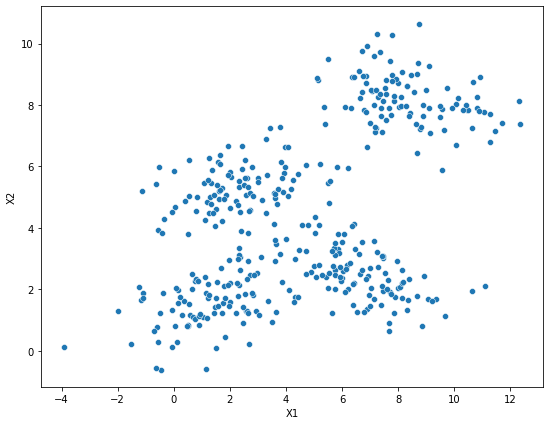

In [9]:
X_df = pd.DataFrame(X, columns=['X1', 'X2'])
X_df.head()
plt.figure(figsize=(9,7))
sns.scatterplot(data=X_df, 
                x="X1",
                y="X2")

In [10]:
# Create a grid for visualization purposes 
x = np.linspace(np.min(X[...,0])-1,np.max(X[...,0])+1,100)
y = np.linspace(np.min(X[...,1])-1,np.max(X[...,1])+1,80)
X_,Y_ = np.meshgrid(x,y)
pos = np.array([X_.flatten(),Y_.flatten()]).T
print(pos.shape)
print(np.max(pos[...,1]))

(8000, 2)
11.649791770245963


In [11]:
# define the number of clusters to be learned
k = 4

# create and initialize the cluster centers and the weight paramters
weights = np.ones((k)) / k
means = np.random.choice(X.flatten(), (k, X.shape[1]))
print(means)
print(weights)

[[-0.56558623 11.07359087]
 [ 2.45860316  1.96301666]
 [ 5.26936379  9.05800189]
 [ 7.27907028  1.01700859]]
[0.25 0.25 0.25 0.25]


In [12]:
# create and initialize a Positive semidefinite convariance matrix 
cov = []
for i in range(k):
  cov.append(make_spd_matrix(X.shape[1]))
cov = np.array(cov)
print(cov.shape)

(4, 2, 2)


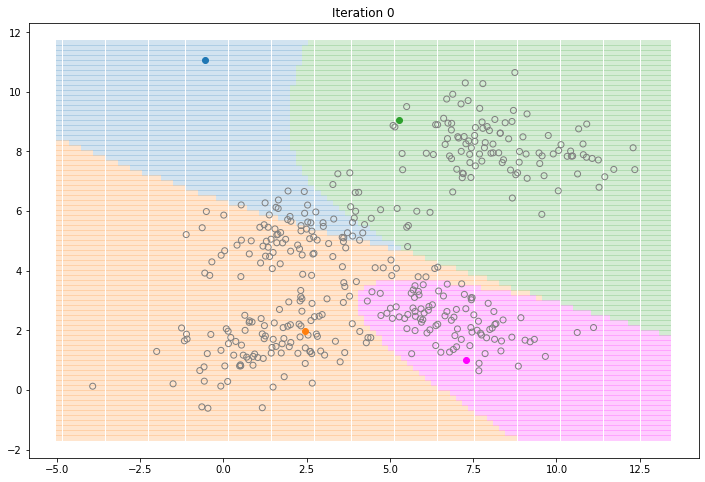

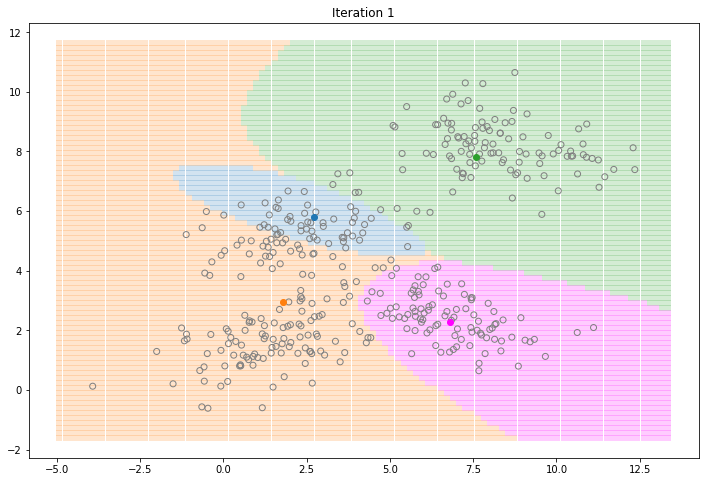

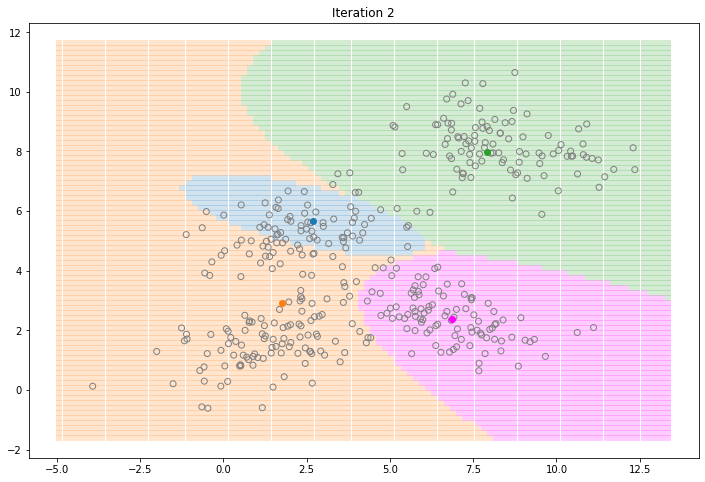

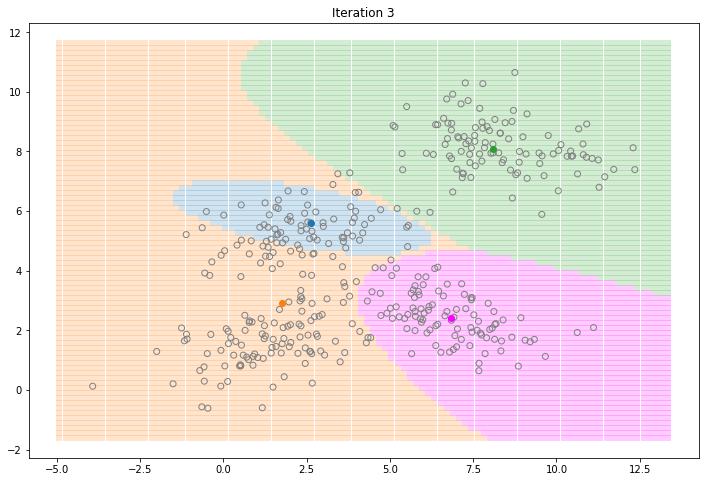

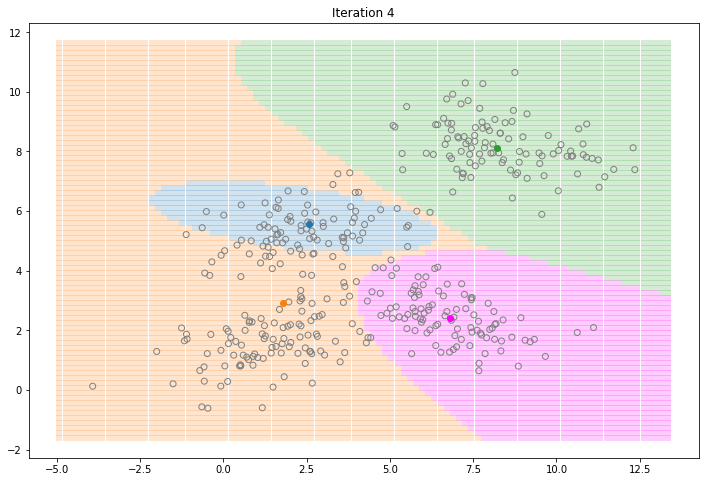

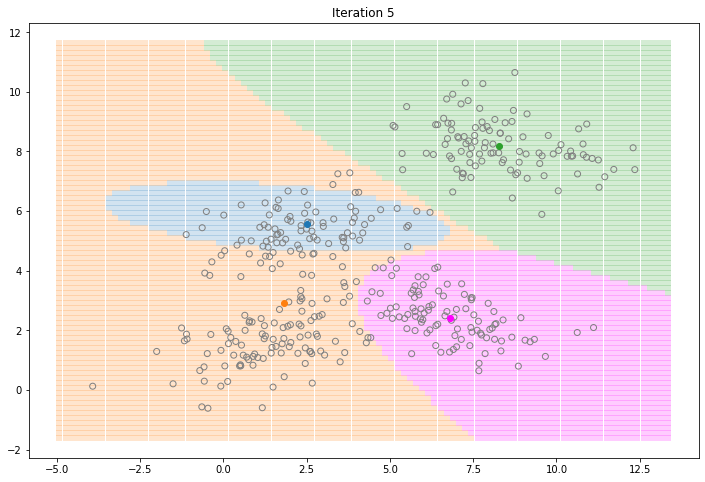

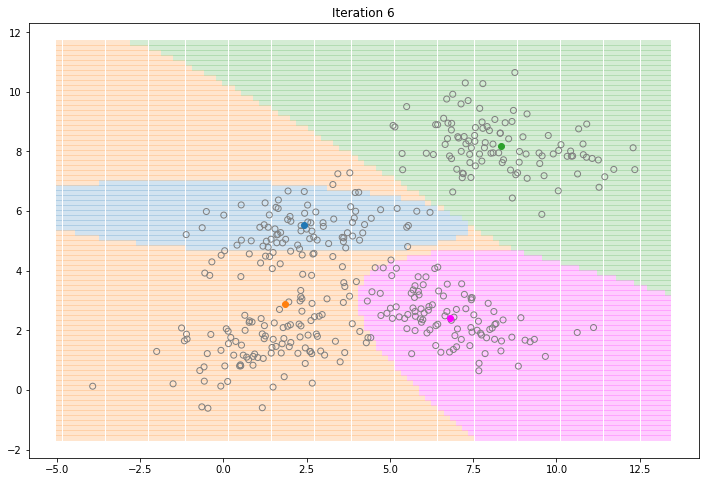

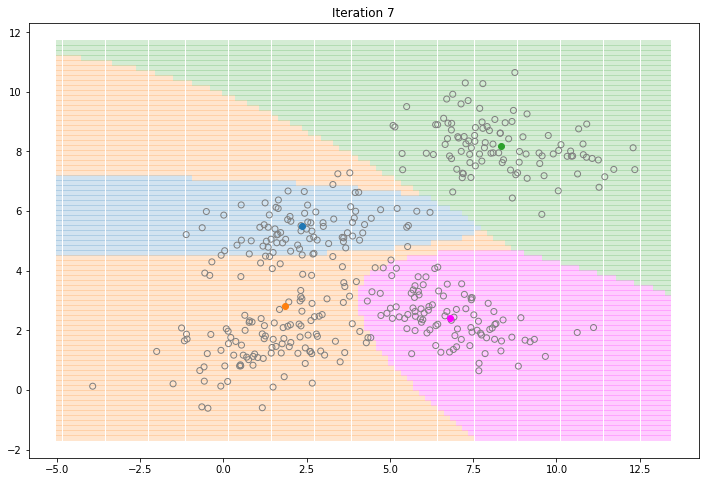

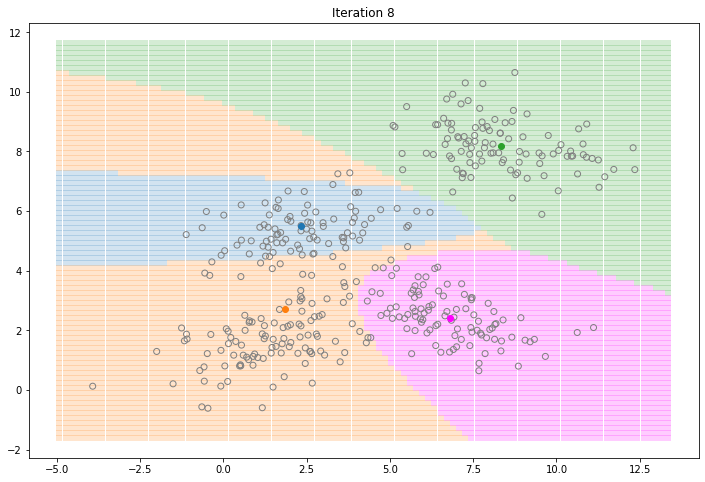

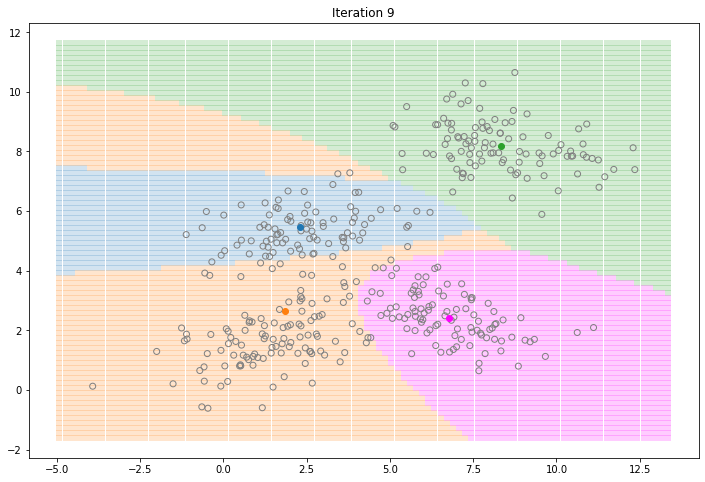

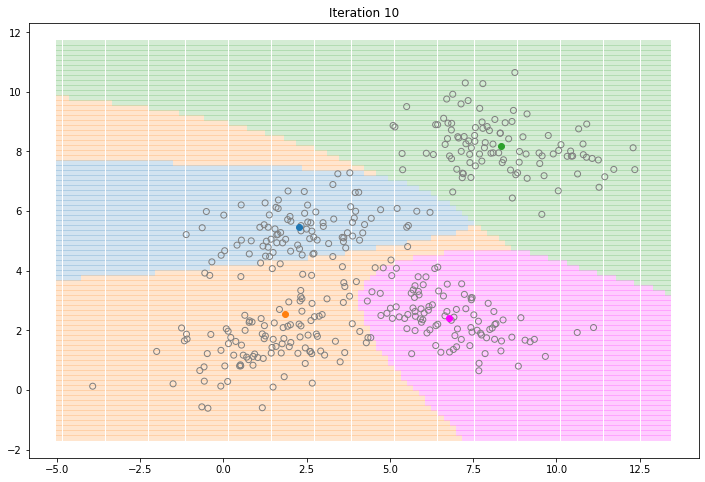

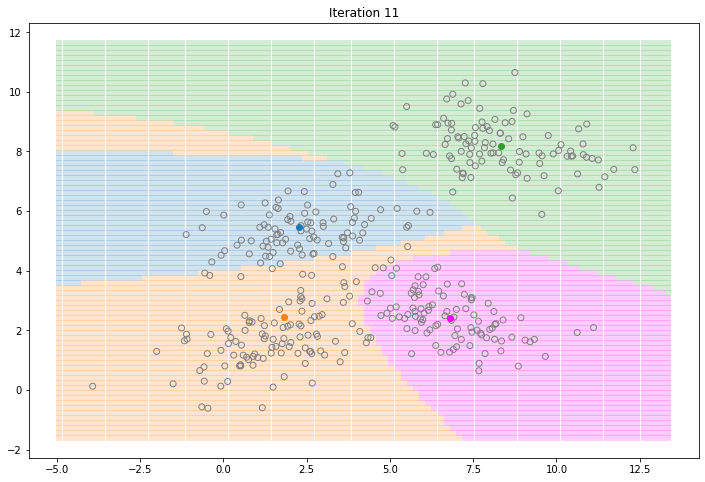

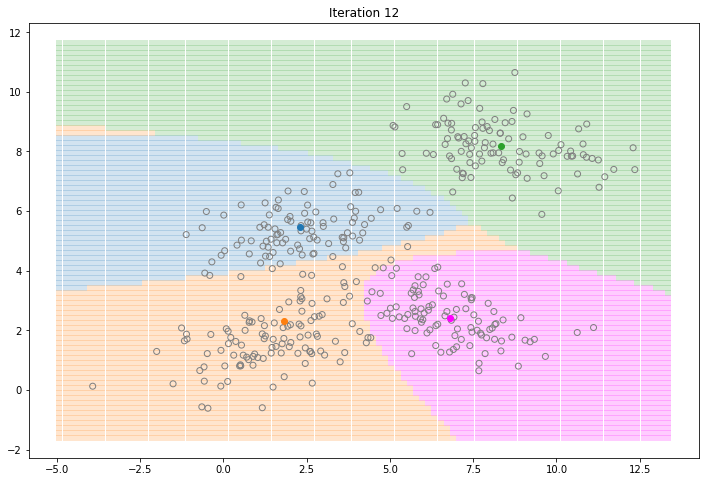

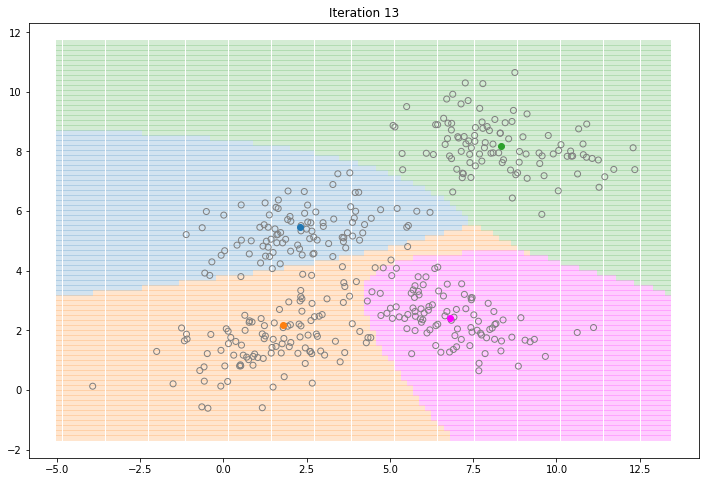

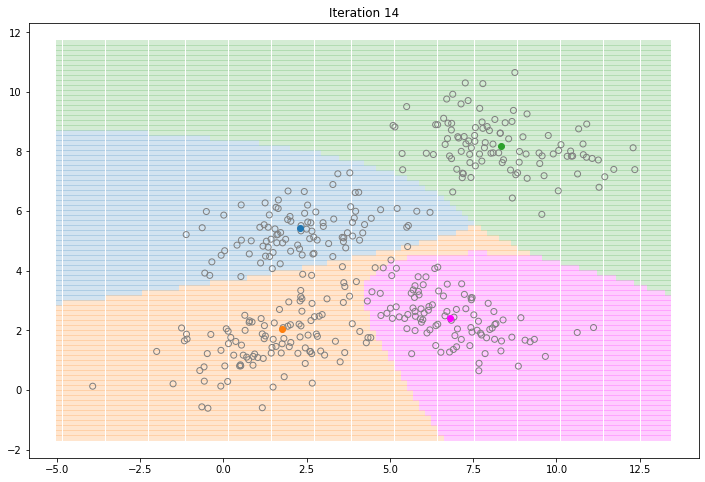

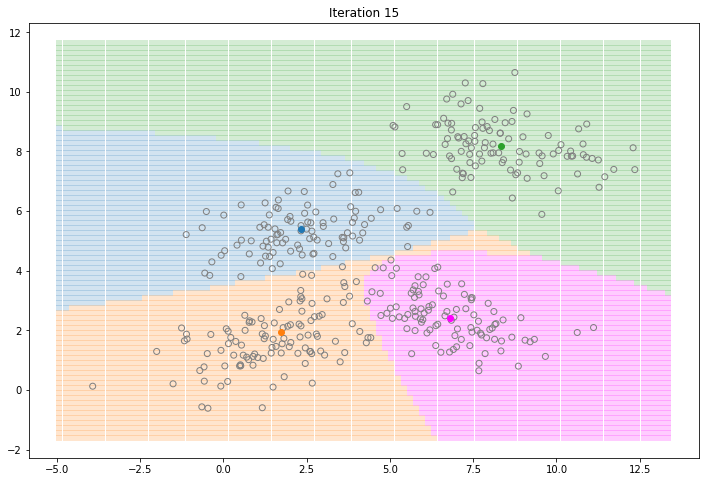

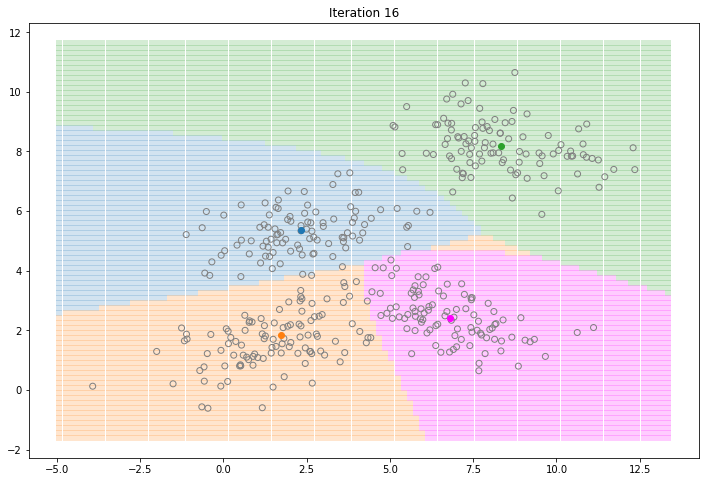

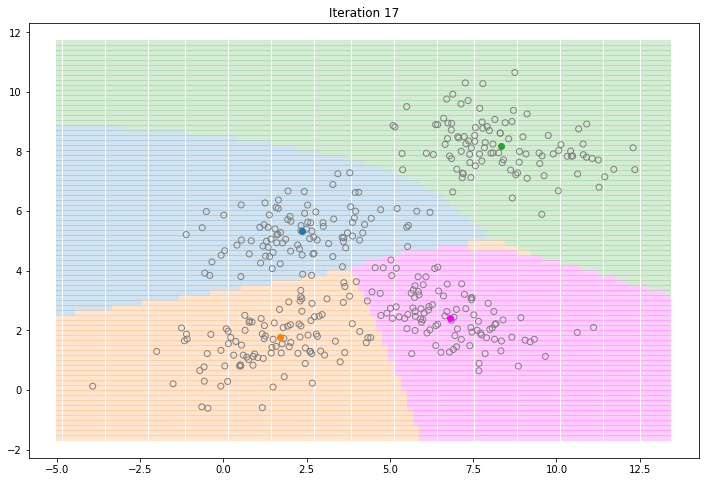

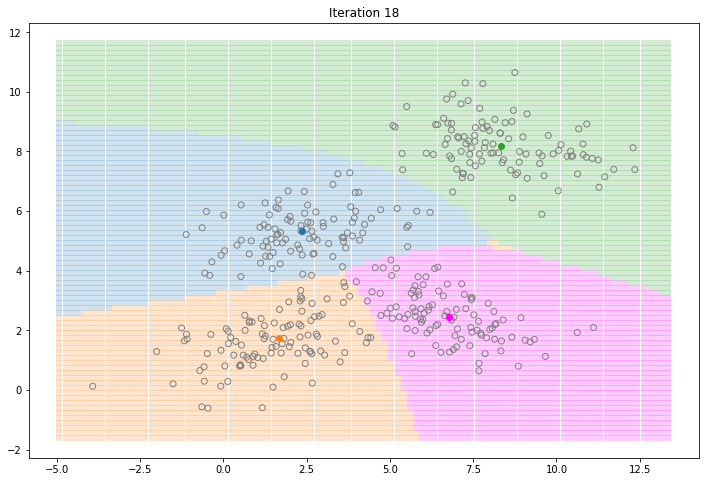

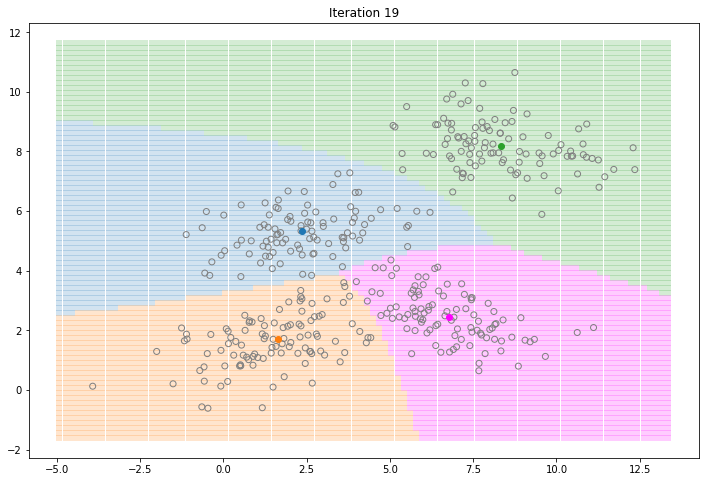

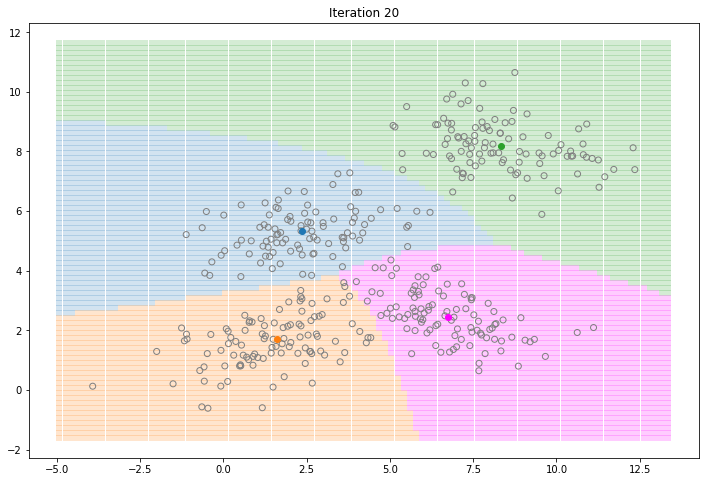

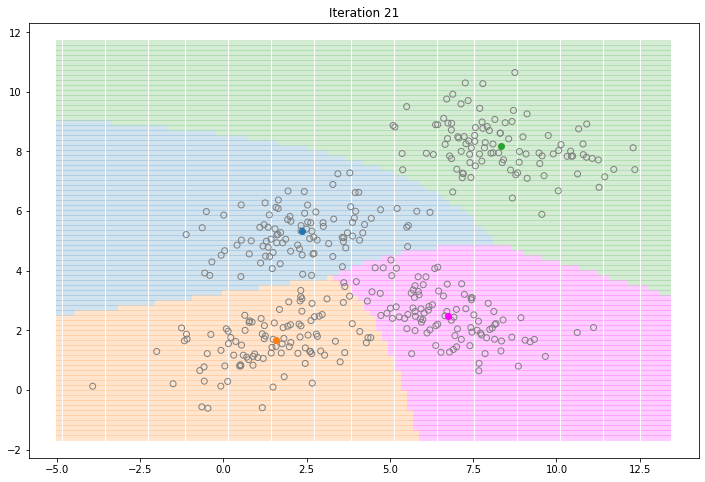

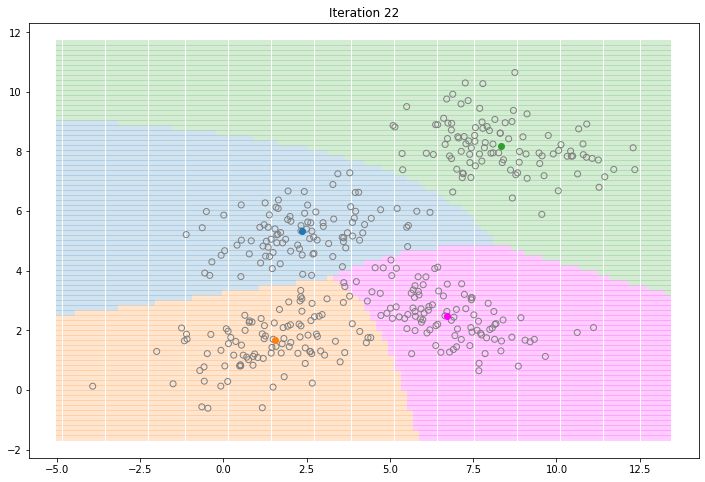

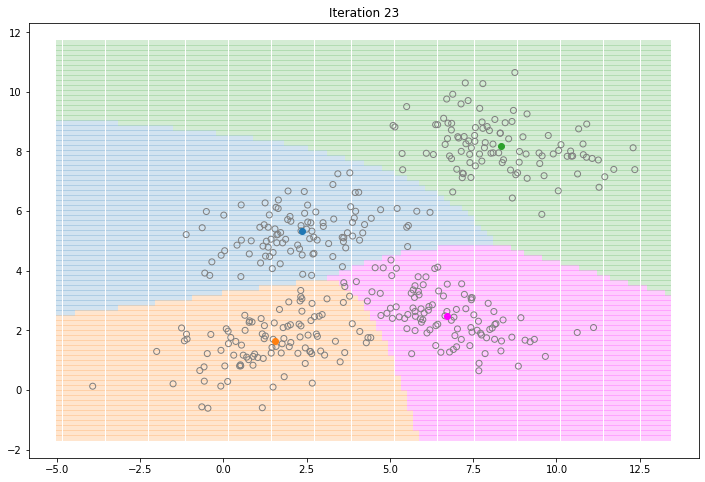

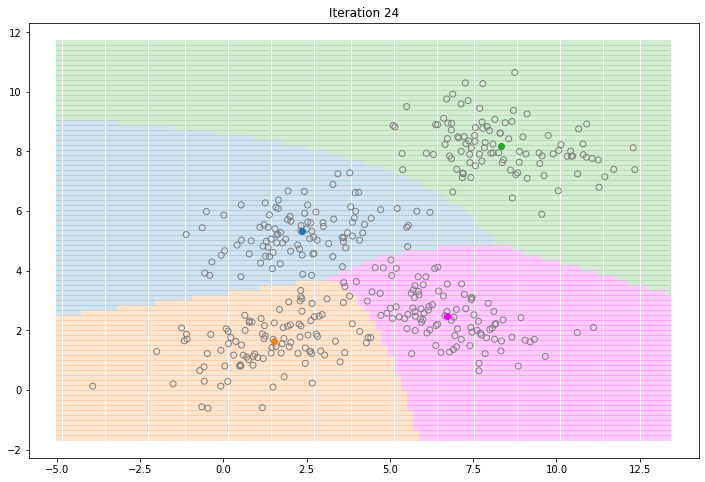

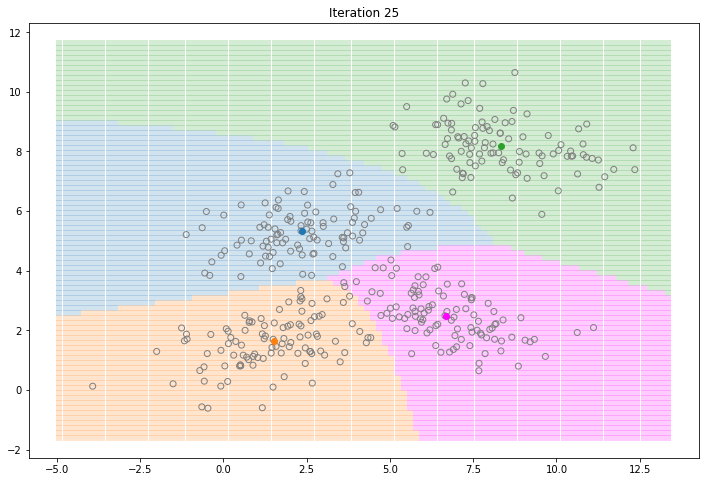

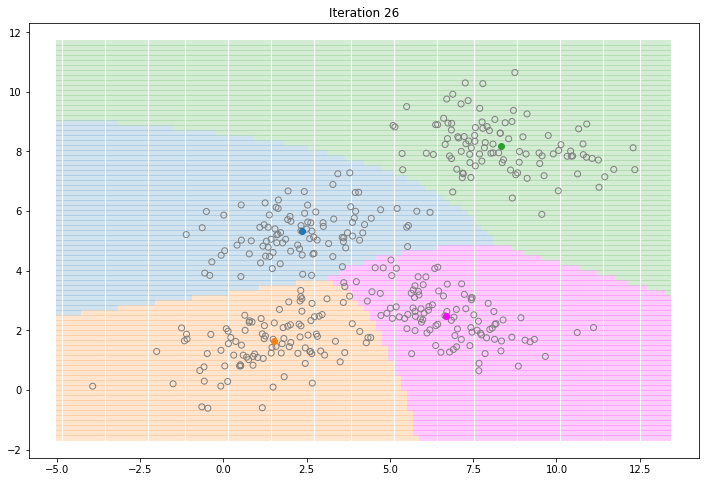

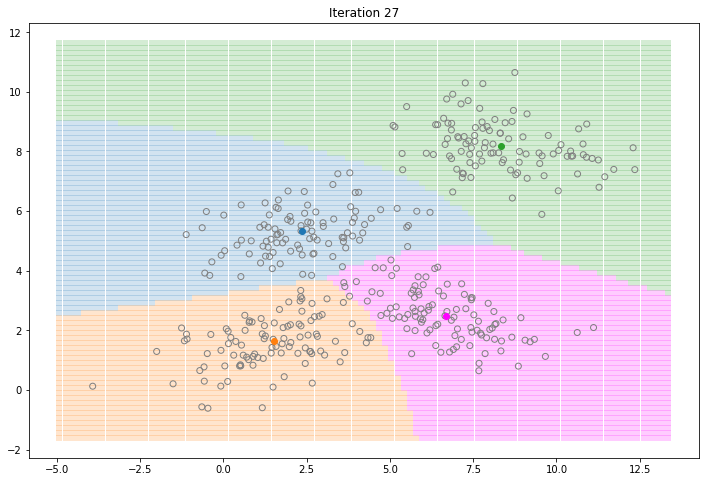

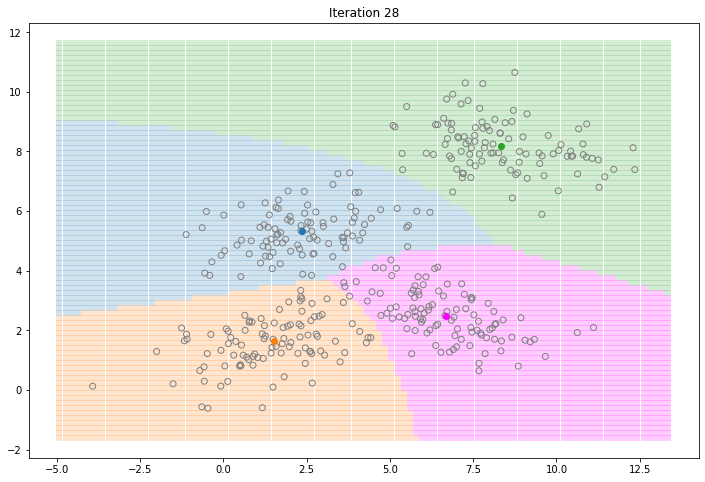

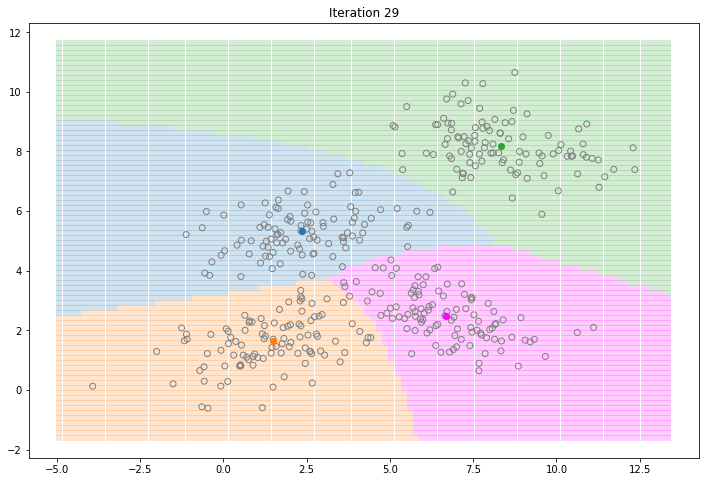

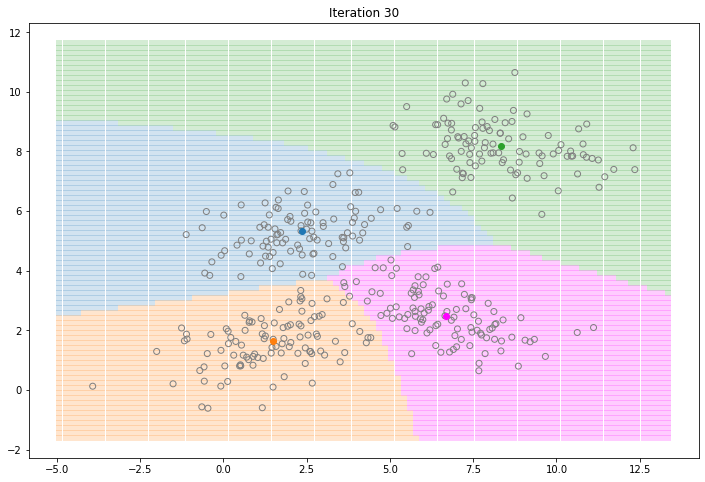

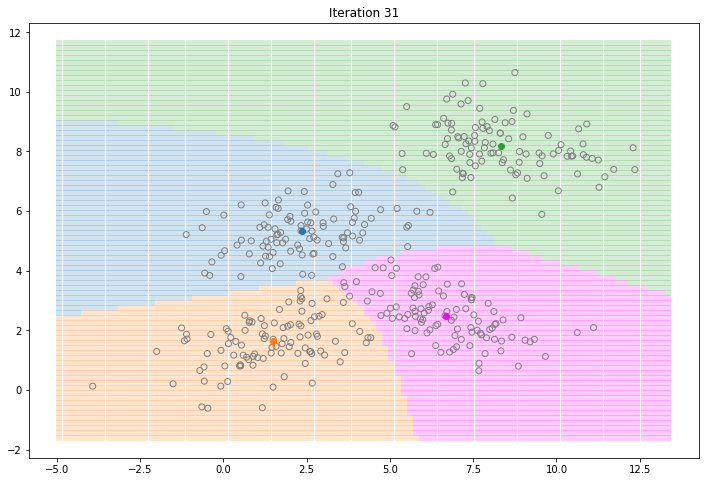

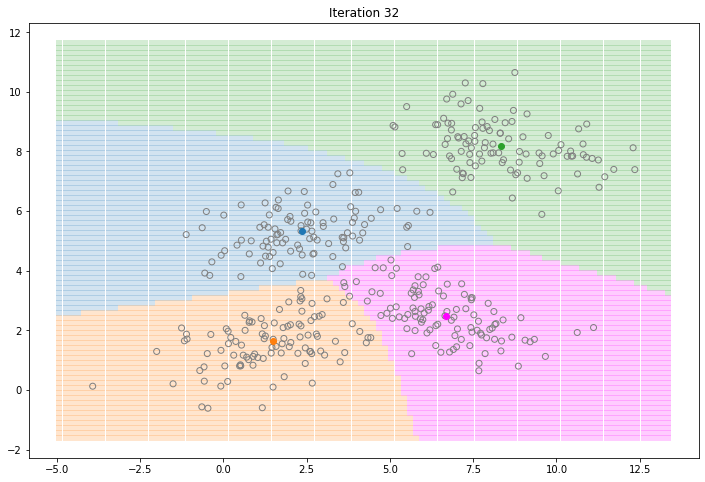

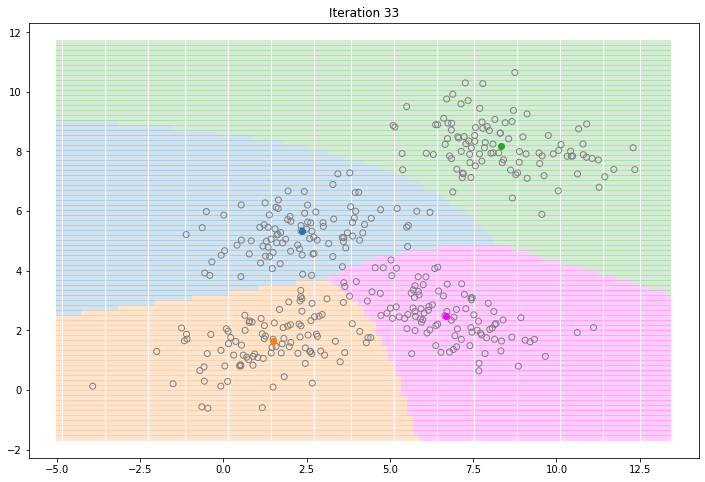

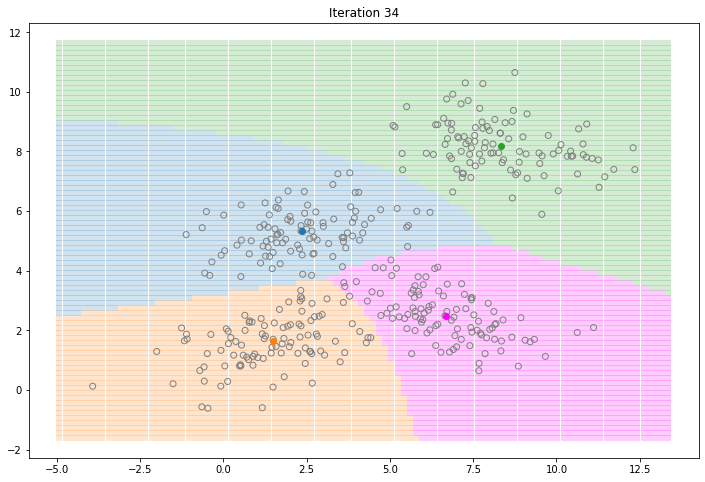

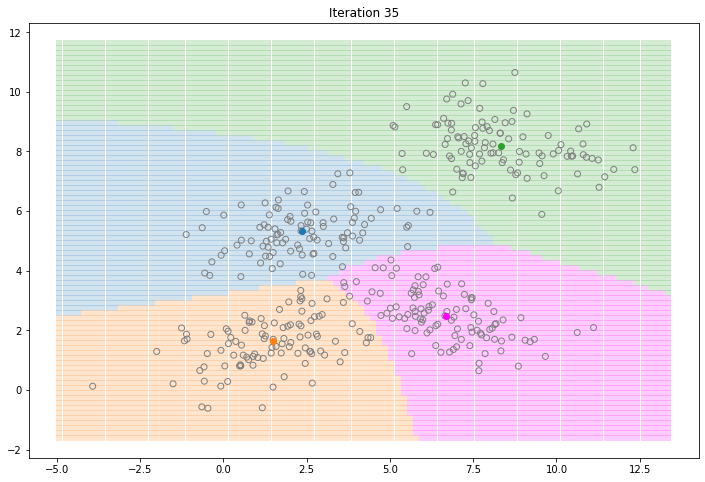

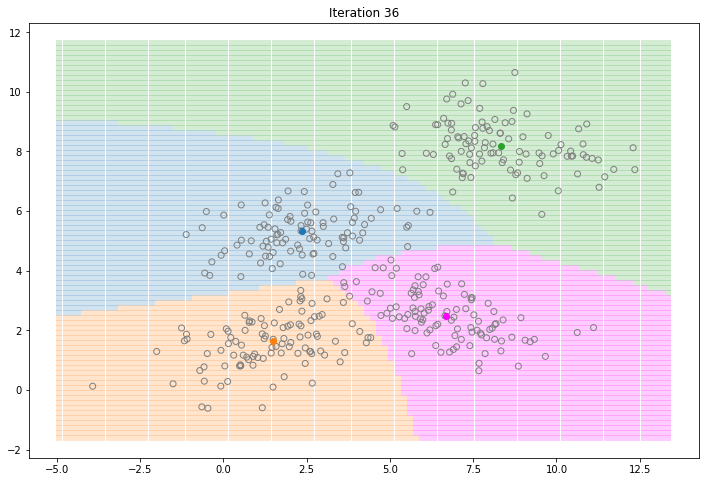

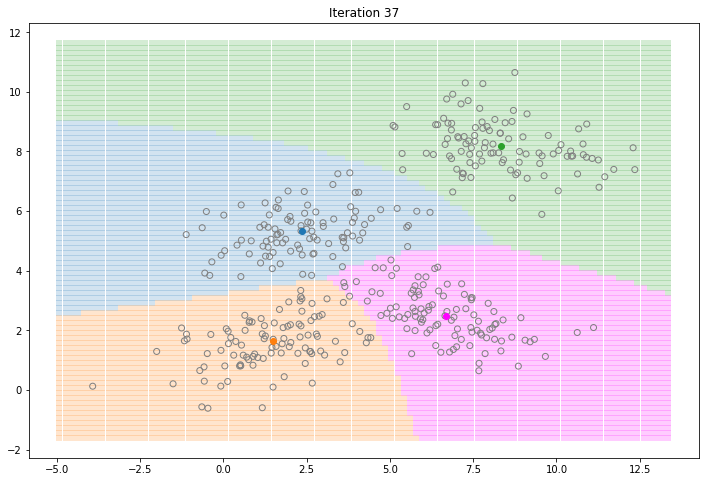

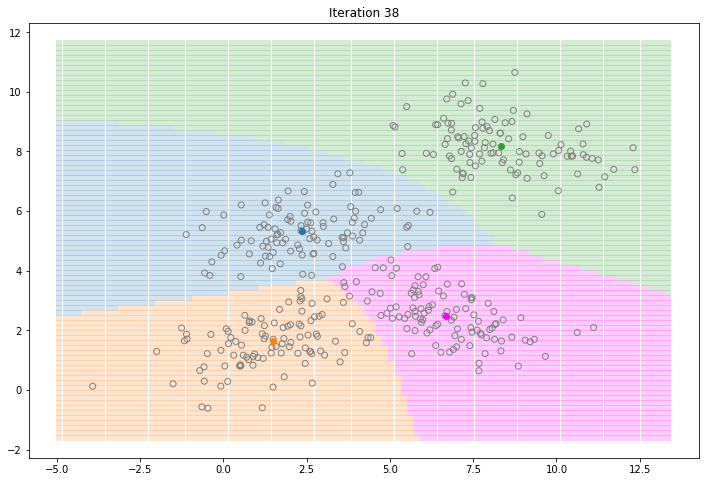

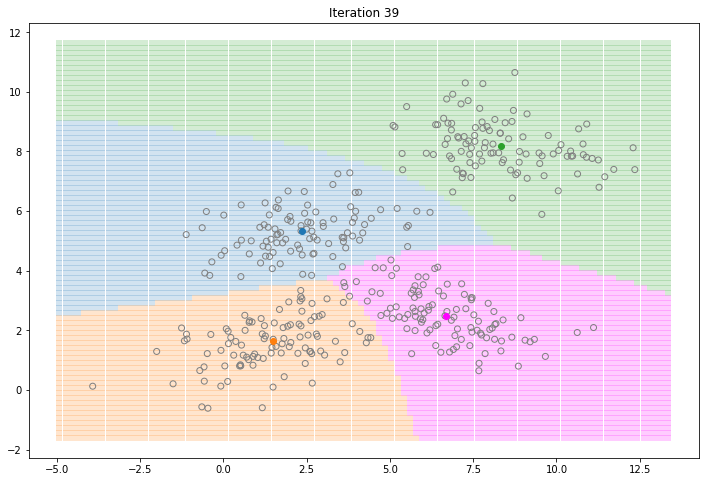

In [13]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'magenta', 'yellow', 'red', 'brown', 'grey']
eps=1e-8

# run GMM for 40 steps
for step in range(40):

  # visualize the learned clusters
  if step % 1 == 0:
    plt.figure(figsize=(12,int(8)))
    plt.title("Iteration {}".format(step))
    axes = plt.gca()
    
    likelihood = []
    for j in range(k):
      likelihood.append(multivariate_normal.pdf(x=pos, mean=means[j], cov=cov[j]))
    likelihood = np.array(likelihood)
    predictions = np.argmax(likelihood, axis=0)
    
    for c in range(k):
      pred_ids = np.where(predictions == c)
      plt.scatter(pos[pred_ids[0],0], pos[pred_ids[0],1], color=colors[c], alpha=0.2, edgecolors='none', marker='s')
    
    plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')
    
    for j in range(k):
      plt.scatter(means[j][0], means[j][1], color=colors[j])
      
    plt.show()

  likelihood = []
  # Expectation step
  for j in range(k):
    likelihood.append(multivariate_normal.pdf(x=X, mean=means[j], cov=cov[j]))
  likelihood = np.array(likelihood)
  assert likelihood.shape == (k, len(X))
    
  b = []
  # Maximization step 
  for j in range(k):
    # E-Step
    # use the current values for the parameters to evaluate the posterior
    # probabilities of the data to have been generanted by each gaussian
    b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))

    # M-Step
    # updage mean and variance
    means[j] = np.sum(b[j].reshape(len(X),1) * X, axis=0) / (np.sum(b[j]+eps))
    cov[j] = np.dot((b[j].reshape(len(X),1) * (X - means[j])).T, (X - means[j])) / (np.sum(b[j])+eps)

    # update the weights
    weights[j] = np.mean(b[j])
    
    assert cov.shape == (k, X.shape[1], X.shape[1])
    assert means.shape == (k, X.shape[1])

## Exercise 3 (GMM with Scikit-learn)

Generate random samples using [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html?highlight=make_moons#sklearn.datasets.make_moons) and fit the data using [`GaussianMixture`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) class from sklearn. Compare the [`Akaike information criterion (AIC)`](https://en.wikipedia.org/wiki/Akaike_information_criterion) and [`Bayesian information criterion (BIC)`](https://en.wikipedia.org/wiki/Bayesian_information_criterion) values for different values of `n_components` in GaussianMixture class.

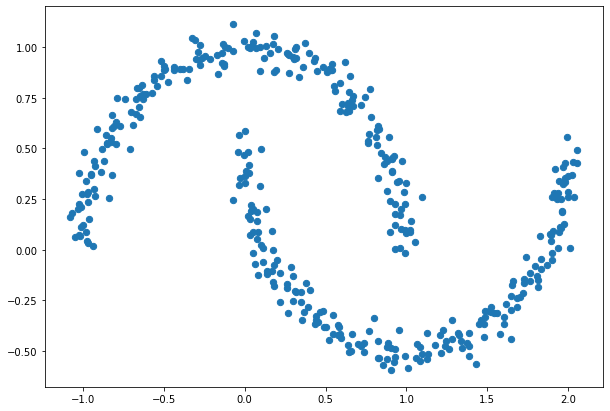

In [20]:
# Generate some data
from sklearn.datasets import make_moons
X, y = make_moons(400, noise=.05, random_state=0)

# Plot the data
plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], s=40)

In [21]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
  """Draw an ellipse with a given position and covariance"""
  ax = ax or plt.gca()
  
  # Convert covariance to principal axes
  if covariance.shape == (2, 2):
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
  else:
    angle = 0
    width, height = 2 * np.sqrt(covariance)
  
  # Draw the Ellipse
  for nsig in range(1, 4):
    ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                          angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
  plt.figure(figsize=(10,7))
  ax = ax or plt.gca()
  labels = gmm.fit(X).predict(X)
  if label:
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
  else:
    ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
  ax.axis('equal')
  
  w_factor = 0.2 / gmm.weights_.max()
  for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)

If we try to fit this with a two-component GMM viewed as a clustering model, the results are not particularly useful:

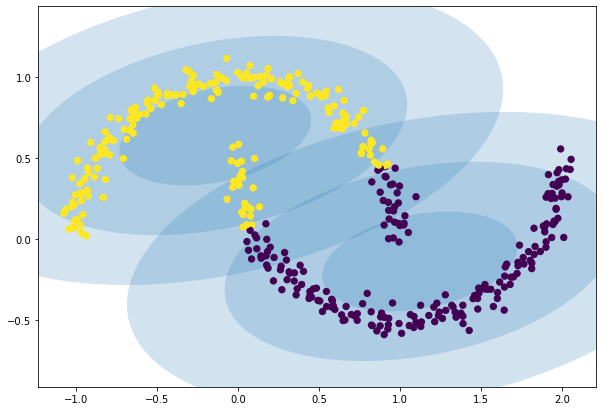

In [22]:
from sklearn.mixture import GaussianMixture
n_components = 2

gmm = GaussianMixture(n_components=n_components, random_state=42, covariance_type="full").fit(X)
plot_gmm(gmm, X)

But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the predict_proba method. This returns a matrix of size `[n_samples, n_clusters]` which measures the probability that any point belongs to the given cluster:

In [23]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    1.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.003 0.997]
 [0.955 0.045]]


But if we instead use many more components and ignore the cluster labels, we find a fit that is much closer to the input data:

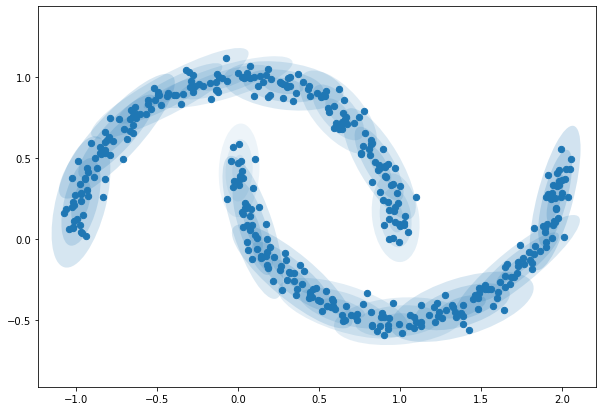

In [24]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, X, label=False)

Here the mixture of 16 Gaussians serves not to find separated clusters of data, but rather to model the overall distribution of the input data. This is a generative model of the distribution, meaning that the GMM gives us the recipe to generate new random data distributed similarly to our input.

Text(0.5, 0, 'n_components')

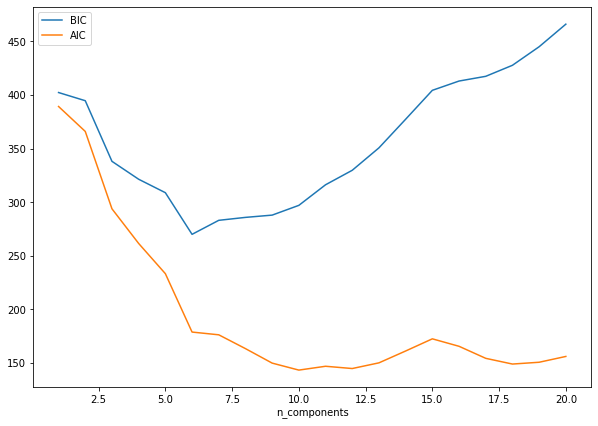

In [19]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.figure(figsize=(10,7))
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. The AIC tells us that our choice of 16 components above was probably too many: around 8-12 components would have been a better choice. As is typical with this sort of problem, the BIC recommends a simpler model.

Notice: This choice of number of components measures how well GMM works as a density estimator, not how well it works as a clustering algorithm.